In [1]:
import numpy as np
import keras
import tensorflow as tf
from keras import backend as k
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.preprocessing.image import load_img
import itertools
import time
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.models import load_model
model=load_model ('classification_of_cable_with_mobilenetV2_last.h5')

W0811 22:36:20.530548 16872 module_wrapper.py:139] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 22:36:20.604353 16872 module_wrapper.py:139] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 22:36:20.637263 16872 module_wrapper.py:139] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 22:36:20.640255 16872 module_wrapper.py:139] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0811 22:36:20.650229 1

In [ ]:
test_path = 'F:/Data/ORIG/Data_aug/Test'

In [ ]:
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(75,75),classes=['cable','no'],batch_size = 10,shuffle = False)

In [ ]:
test_labels = test_batches.classes

In [ ]:

start = time.perf_counter()
predictions = model.predict_generator(test_batches,steps=20,verbose=0)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)


In [ ]:
cm = confusion_matrix(test_labels,predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

In [ ]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [ ]:
cm_plot_labels = ['Cable','No Cable']
plot_confusion_matrix(cm,cm_plot_labels,title= 'Confusion Matrix')

In [ ]:
ground_truth = test_batches.classes
label2index = test_batches.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_batches.samples))

In [ ]:
fnames = test_batches.filenames
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(test_path,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,predictions.argmax(axis=1)))

In [3]:
#SEQUENCE

In [4]:
test_path = 'F:/Data/ORIG/Test'

In [5]:
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(75,75),classes=['cable','no'],batch_size = 10,shuffle = False)

Found 200 images belonging to 2 classes.


In [6]:
test_labels = test_batches.classes

In [7]:

start = time.perf_counter()
predictions = model.predict_generator(test_batches,steps=20,verbose=0)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)


Elapsed 3.895 seconds.


In [8]:
cm = confusion_matrix(test_labels,predictions.argmax(axis=1))

In [9]:
test_batches.class_indices

{'cable': 0, 'no': 1}

In [10]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[193   7]
 [  0   0]]


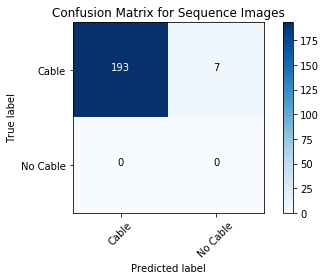

In [11]:
cm_plot_labels = ['Cable','No Cable']
plot_confusion_matrix(cm,cm_plot_labels,title= 'Confusion Matrix for Sequence Images')

In [12]:
ground_truth = test_batches.classes
label2index = test_batches.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_batches.samples))

No of errors = 7/200


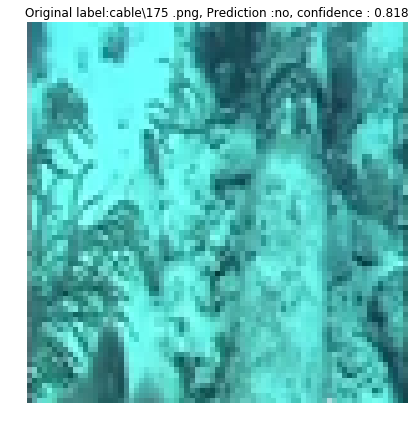

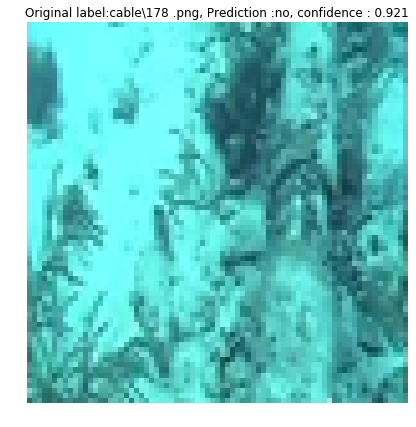

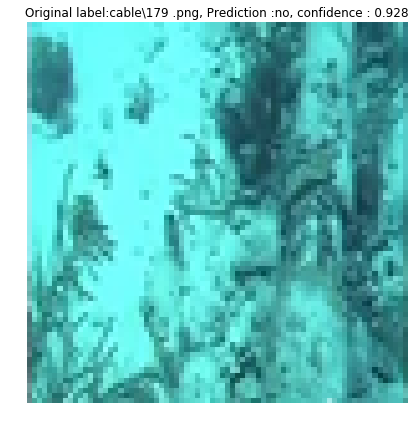

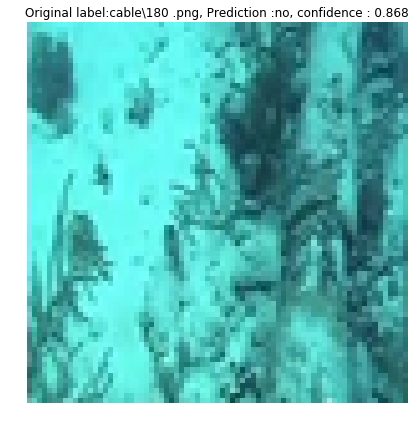

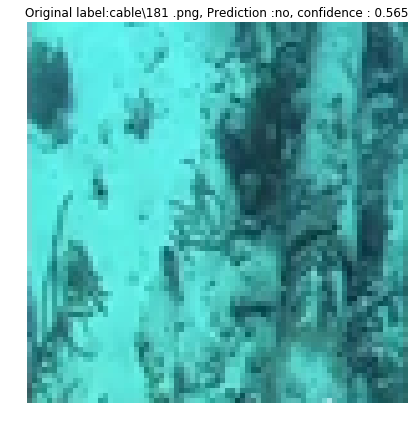

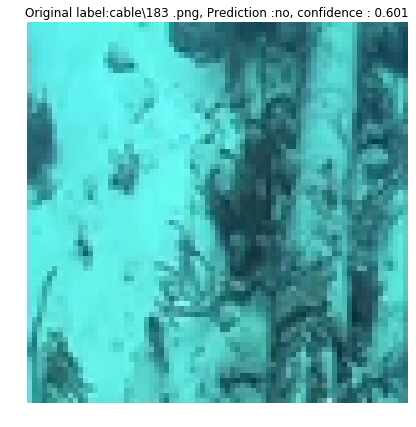

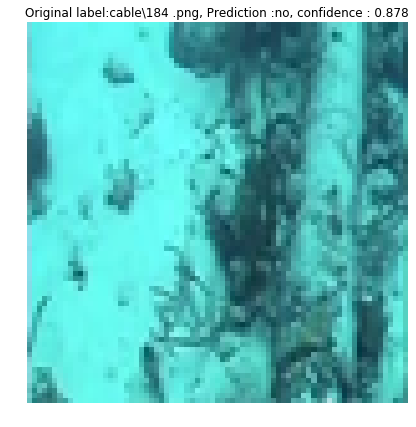

In [13]:
fnames = test_batches.filenames
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(test_path,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       200
           1       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96       200
   macro avg       0.50      0.48      0.49       200
weighted avg       1.00      0.96      0.98       200



C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
